# **Customer Conversion Prediction**

Problem Statement You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance.

## **Data**

The historical sales data is available as a compressed file here.

## **Dataset** : 
https://drive.google.com/file/d/1BJ_Q8Q-kDRisAQyLltBQggeb0QmdWGZy/view

## **Features**:

● age (numeric)

● job : type of job

● marital : marital status

● educational_qual : education status

● call_type : contact communication type

● day: last contact day of the month (numeric)

● mon: last contact month of year

● dur: last contact duration, in seconds (numeric)

● num_calls: number of contacts performed during this campaign and for this client

● prev_outcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):

● y - has the client subscribed to the insurance?

## **Minimum Requirements**

It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the conversion rate. AUROC must be used as a metric to evaluate the performance of the models.

##**Observation**

SUPERVISED LEARNING PROBLEM:


1.  We have target variable y.
2.  It is classification problem.
3.  y is a categorical variable.

We are trying to build a best ML model to predict if a client will subscribe to the insurance based on the AUROC value.

When we are solving classification problem, We want to check is it balanced or imbalanced.

# **Importing Important Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.combine import SMOTEENN

from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve

# **Importing the Dataset**

In [2]:
df = pd.read_csv('Customer Conversion Prediction.csv')
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


**Checking if the given data is balanced or not**

In [3]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [4]:
# Majority class
((39922)/(39922+5289))*100

88.30151954170445

In [5]:
# Minority class
((5289)/(39922+5289))*100

11.698480458295547

Here, The target column is Imbalanced.

1.  Majority class is from **NO** with **88.3%**

2.  Minority class is from **YES** with **11.6%**

[]

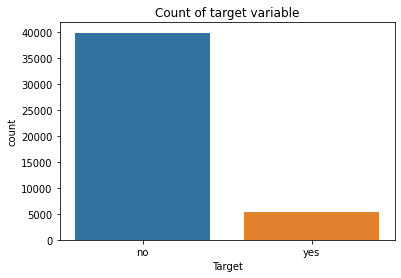

In [6]:
sns.countplot(x = df.y, data = df)
plt.xlabel("Target")
plt.title("Count of target variable")
plt.plot()

In [7]:
# Looking into the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [8]:
# getting the shape of dataset
df.shape

(45211, 11)

# **Data cleaning**
Here, we do follow the below steps:

1.  Check for missing values
2.  Check for duplicates
3.  Check data format(datatype)
4.  Spelling correction
5.  Check for outliers

In [9]:
df.head(10)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
5,35,management,married,tertiary,unknown,5,may,139,1,unknown,no
6,28,management,single,tertiary,unknown,5,may,217,1,unknown,no
7,42,entrepreneur,divorced,tertiary,unknown,5,may,380,1,unknown,no
8,58,retired,married,primary,unknown,5,may,50,1,unknown,no
9,43,technician,single,secondary,unknown,5,may,55,1,unknown,no


## **1. Check for missing values (null values)**

In [10]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

Here, there are no null values in any columns

## **2. Check for duplicates**

In [11]:
df = df.drop_duplicates()
df.duplicated().sum()

0

## **3. Check data is in right format(datatype)**

In [12]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

## **4. Spelling correction**

In [13]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [14]:
print(df['job'].unique())
print(df['marital'].unique())
print(df['education_qual'].unique())
print(df['call_type'].unique())
print(df['mon'].unique())
print(df['y'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['no' 'yes']


There is no spelling mistakes in the data.

## **5.Check for outliers(Outliers detection)**

In [15]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


### **Numerical column outlier detection**

<AxesSubplot:xlabel='age'>

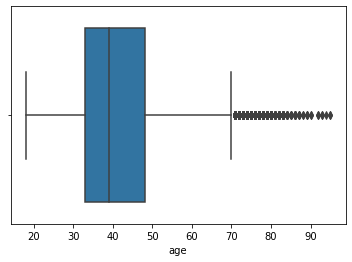

In [16]:
sns.boxplot(df['age'])

### **Function to find outliers**

In [17]:
def detect_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5*(IQR)
    upper_fence = Q3 + 1.5*(IQR)
    total_outliers = dataframe.loc[(dataframe[column] < lower_fence) | (dataframe[column] > upper_fence)]
    if len(total_outliers):
      print("LowerFence: {}, UpperFence: {}\n{} Outliers present in {}".format(lower_fence, upper_fence, len(total_outliers), column))

In [18]:
def clip_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5*(IQR)
    upper_fence = Q3 + 1.5*(IQR)
    dataframe[column] = dataframe[column].clip(lower_fence, upper_fence)

In [19]:
detect_outliers(df, "age")

LowerFence: 10.5, UpperFence: 70.5
487 Outliers present in age


**Clipping the outliers b/t upper and lower fence values**

In [20]:
clip_outliers(df,'age')

**Boxplot of age after cleaning the outliers**

<AxesSubplot:xlabel='age'>

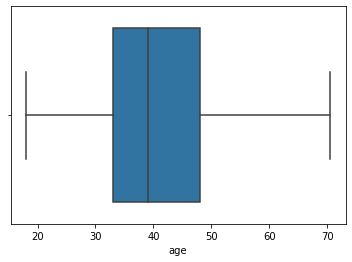

In [21]:
sns.boxplot(df['age'])

**Checking outliers for 'dur'(duration)**

<AxesSubplot:xlabel='dur'>

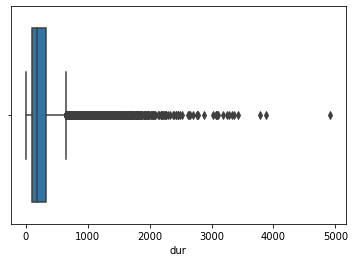

In [22]:
sns.boxplot(df['dur'])

In [23]:
detect_outliers(df,'dur')

LowerFence: -221.0, UpperFence: 643.0
3235 Outliers present in dur


In [24]:
clip_outliers(df,'dur')

**Boxplot of 'dur' after cleaning the outliers**

<AxesSubplot:xlabel='dur'>

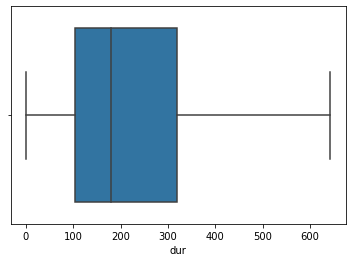

In [25]:
sns.boxplot(df['dur'])

In [26]:
df.dur.describe()

count    45205.00000
mean       234.95620
std        176.75476
min          0.00000
25%        103.00000
50%        180.00000
75%        319.00000
max        643.00000
Name: dur, dtype: float64

**Checking outliers for 'num_calls'**

<AxesSubplot:xlabel='num_calls'>

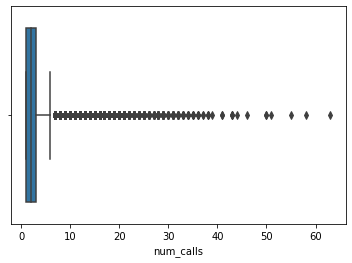

In [27]:
sns.boxplot(df['num_calls'])

In [28]:
detect_outliers(df, 'num_calls')

LowerFence: -2.0, UpperFence: 6.0
3064 Outliers present in num_calls


In [29]:
clip_outliers(df,'num_calls')

**Boxplot of 'num_calls' after cleaning the outliers**

<AxesSubplot:xlabel='num_calls'>

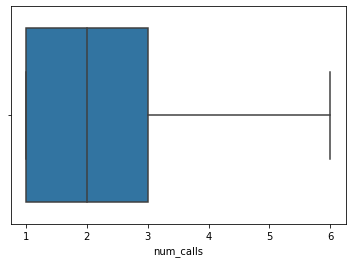

In [30]:
sns.boxplot(df['num_calls'])

In [31]:
df.day.describe()

count    45205.00000
mean        15.80688
std          8.32234
min          1.00000
25%          8.00000
50%         16.00000
75%         21.00000
max         31.00000
Name: day, dtype: float64

## **Cleaning Categorical Columns**

In [32]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [33]:
df['job'].replace(['admin.'],'admin', inplace= True)

In [34]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

**Exploratory Data Analysis**

**EDA for Categorical Columns**

**Checking Relationship Between Job feature and Y Target**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

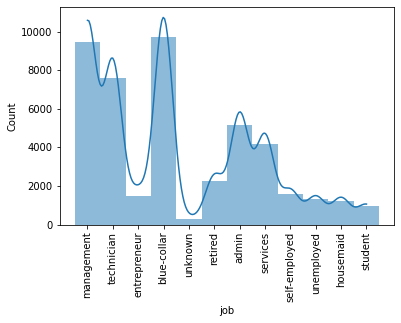

In [35]:
sns.histplot(df.job, linewidth=0,kde=True)
plt.xticks(rotation=90)

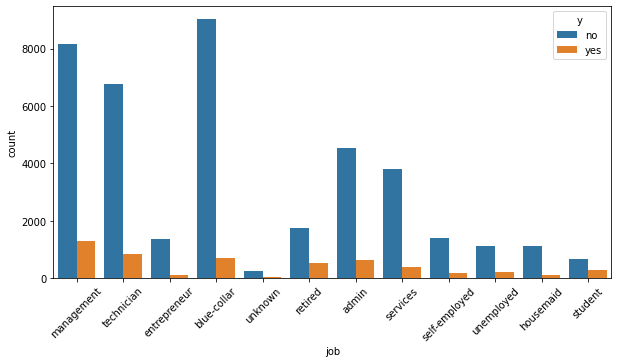

In [36]:
fig, axes=plt.subplots(ncols=1,figsize=(10,5))
sns.countplot(x='job', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()



1.   The most targeted customers: Blue-collar job, but comparing with conversion rate, we end up in losing lot of money.(Better to avoid targetting Blue-collar customers a lot)

2.   Convertion rate is maximum: Management.

3.  But here student has more conversion with average.



**Checking Relationship Between marital feature and y Target**

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

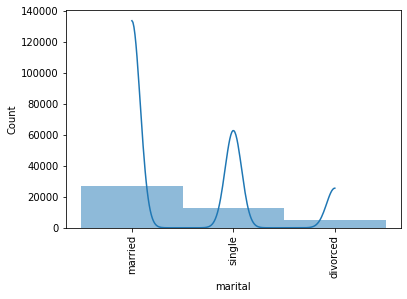

In [37]:
sns.histplot(df.marital, linewidth=0,kde=True)
plt.xticks(rotation=90)

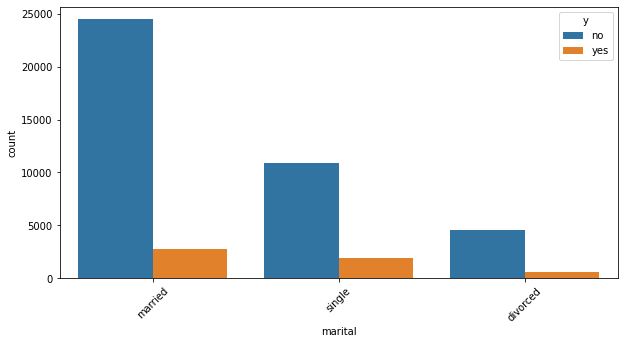

In [38]:

fig, axes=plt.subplots(ncols=1,figsize=(10,5))
sns.countplot(x='marital', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()



1.   Married people are more contacted for insurance.
2.   But in average single people's conversion rate is more.



**Checking Relationship in between Education_qual and y Target**

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

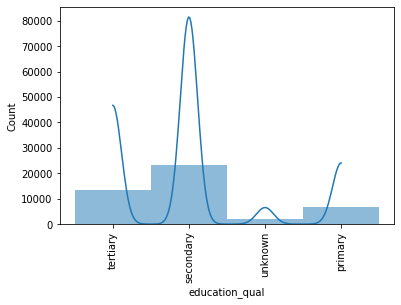

In [39]:
sns.histplot(df.education_qual, linewidth=0,kde=True)
plt.xticks(rotation=90)

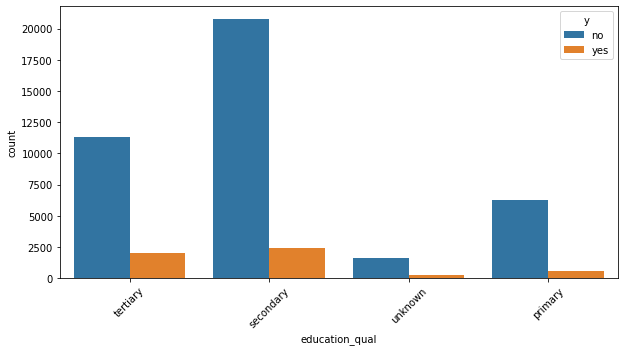

In [40]:
fig, axes=plt.subplots(ncols=1,figsize=(10,5))
sns.countplot(x='education_qual', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()



1.   People with higher education(Secondary/Tertiary --> Collage/Masters) are
option for insurance plans.



**Checking Relationship in between the Call_type feature and y target**

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

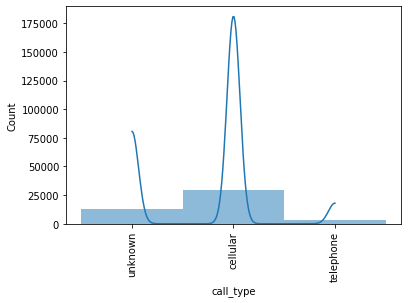

In [41]:
sns.histplot(df.call_type, linewidth=0,kde=True)
plt.xticks(rotation=90)

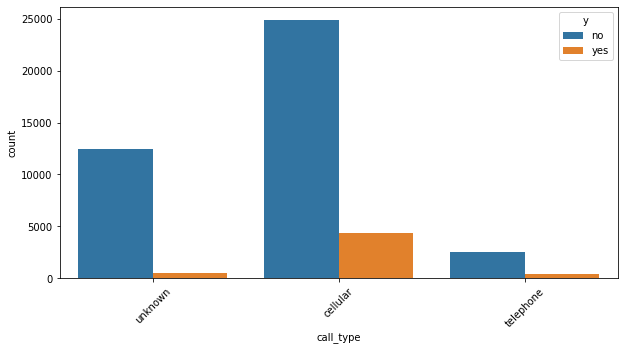

In [42]:
fig, axes=plt.subplots(ncols=1,figsize=(10,5))
sns.countplot(x='call_type', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()



1.   Here, cellular type conversation is contributing a lot towards customers opting for insurance plan



**Checking Relationship between the month feature and y target**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

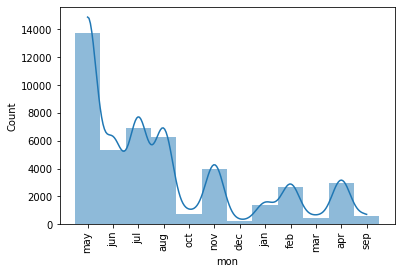

In [43]:
sns.histplot(df.mon, linewidth=0,kde=True)
plt.xticks(rotation=90)

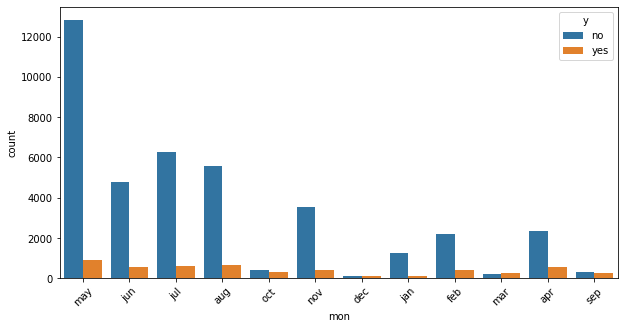

In [44]:
fig, axes=plt.subplots(ncols=1,figsize=(10,5))
sns.countplot(x='mon', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()



1.   People opting for Insurance plans when targeted during start of new financial year/When they get their appraisal cycle result.



**Checking the Relationship between prev_outcome feature and y target**

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

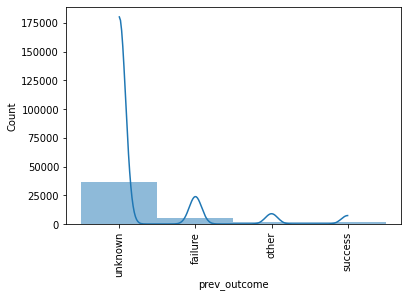

In [45]:
sns.histplot(df.prev_outcome, linewidth=0,kde=True)
plt.xticks(rotation=90)

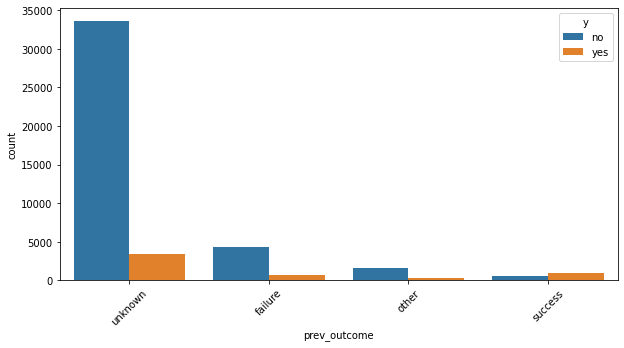

In [46]:
fig, axes=plt.subplots(ncols=1,figsize=(10,5))
sns.countplot(x='prev_outcome', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()

## **EDA For Numarical Columns**

**Checking Relationship Between age feature and y target**

<AxesSubplot:xlabel='age', ylabel='Density'>

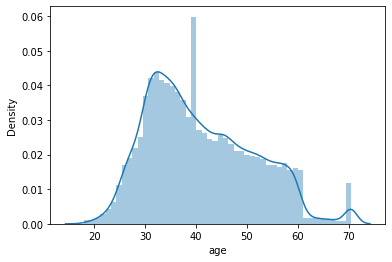

In [47]:
sns.distplot(df['age'])

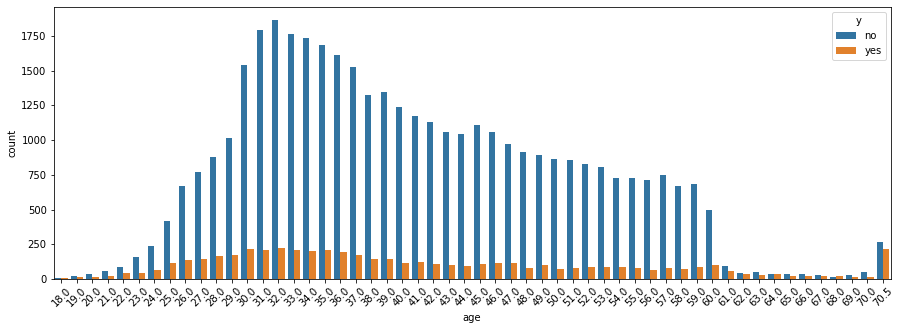

In [48]:
fig, axes=plt.subplots(ncols=1,figsize=(15,5))
sns.countplot(x='age', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()
     

**Checking Relationship in between day feature and y target**

<AxesSubplot:xlabel='day', ylabel='Density'>

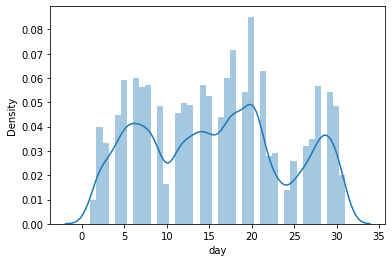

In [49]:
sns.distplot(df['day'])

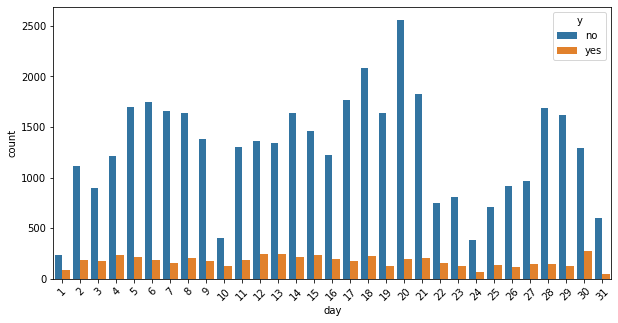

In [50]:
fig, axes=plt.subplots(ncols=1,figsize=(10,5))
sns.countplot(x='day', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()

**Checking Relationship between Duration Feature and Y Target**

<AxesSubplot:xlabel='dur', ylabel='Density'>

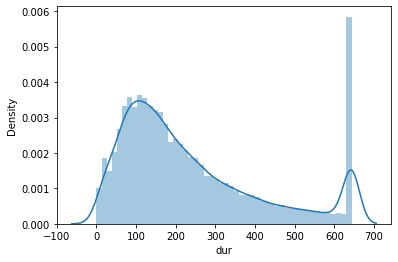

In [51]:
sns.distplot(df['dur'])

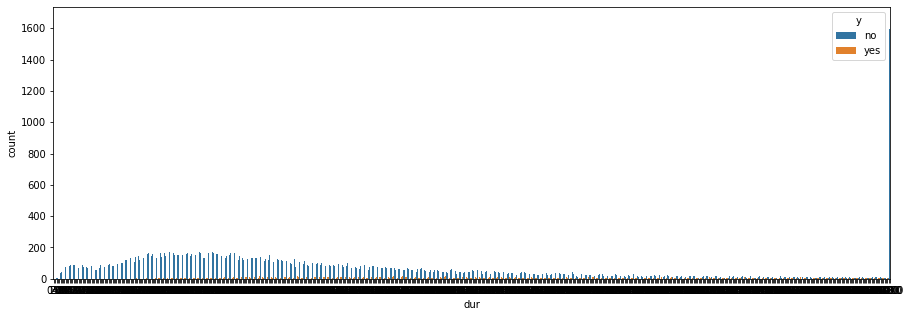

In [52]:
fig, axes=plt.subplots(ncols=1,figsize=(15,5))
sns.countplot(x='dur', hue='y', data=df)
plt.show()

**Checking Relationship in between num_calls feature and y target**

<AxesSubplot:xlabel='num_calls', ylabel='Density'>

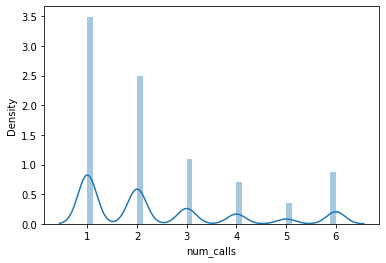

In [53]:
sns.distplot(df['num_calls'])

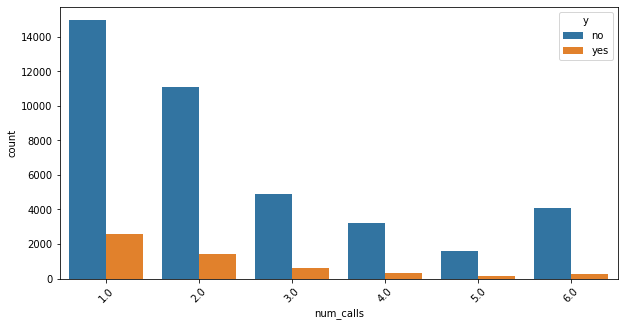

In [54]:
fig, axes=plt.subplots(ncols=1,figsize=(10,5))
sns.countplot(x='num_calls', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()



1.   When contacted over phone, mostly customers opting for insurance in maximum 3 attempts.
2.   As cost effective approach, avoid reaching customer over phone after 3 attempts.



### **Checking datatypes**

In [55]:
df.dtypes

age               float64
job                object
marital            object
education_qual     object
call_type          object
day                 int64
mon                object
dur               float64
num_calls         float64
prev_outcome       object
y                  object
dtype: object

In [56]:
df['age'] = df['age'].astype(int)
df['dur'] = df['dur'].astype(int)
df['num_calls'] = df['num_calls'].astype(int)

In [57]:
#df.drop(['prev_outcome'],axis=1,inplace=True)

## **Encoding the data**

In [58]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

## **Label Encoding**

In [59]:
df['job']=df['job'].map({'blue-collar':0,'entrepreneur':1,'housemaid':2,'services':3,'technician':4,'unknown':5,'self-employed':6,'admin':7,'management':8,'unemployed':9,'retired':10,'student':11})
df['education_qual']=df['education_qual'].map({'primary':0,'secondary':1,'unknown':2,'tertiary':3})
df['call_type']=df['call_type'].map({'unknown':0,'telephone':1,'cellular':2})
df['mon']=df['mon'].map({'may':0,'jul':1,'jan':2,'nov':3,'jun':4,'aug':5,'feb':6,'apr':7,'oct':8,'sep':9,'dec':10,'mar':11})

In [60]:
df['y'] = df['y'].map({'yes':1,'no':0})

## **ONE-HOT ENCODING**

In [61]:
df= pd.get_dummies(df, columns=["marital",'prev_outcome'])
df.head()

,age,job,education_qual,call_type,day,mon,dur,num_calls,y,marital_divorced,marital_married,marital_single,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,8,3,0,5,0,261,1,0,0,1,0,0,0,0,1
1,44,4,1,0,5,0,151,1,0,0,0,1,0,0,0,1
2,33,1,1,0,5,0,76,1,0,0,1,0,0,0,0,1
3,47,0,2,0,5,0,92,1,0,0,1,0,0,0,0,1
4,33,5,2,0,5,0,198,1,0,0,0,1,0,0,0,1


We done with the Encoding part.Now, move with the target and feature selection

## **TARGET AND FEATURE SELCTION:**

In [62]:
X = df[['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls','marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown']].values
y = df['y'].values

We have selected our features and the target variable

## **SPLITTING**

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)


In [64]:
df['job'] = df['job'].astype(int)


### **Random Undersampling:**

In [65]:
from imblearn.under_sampling import RandomUnderSampler #  import 
rus = RandomUnderSampler() #Intialise the model
X_rus, y_rus = rus.fit_resample(X_train, y_train) #resampling the data 
     

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr1 = LogisticRegression()
lr1.fit(X_rus,y_rus)
lr1.score(X_rus,y_rus)

0.8114617940199336

### **Random Oversampling:**

In [68]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler() #Initialis the model 
X_ros, y_ros = ros.fit_resample(X_train, y_train) #Fit the model

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr2 = LogisticRegression()
lr2.fit(X_ros,y_ros)
lr2.score(X_ros,y_ros)

0.8104694835680751

### **SMOTE:**

In [71]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr3 = LogisticRegression()
lr3.fit(X_sm,y_sm)
lr3.score(X_sm,y_sm)

0.8556338028169014

## **SMOTEENN**

In [74]:
import imblearn
from imblearn.combine import SMOTEENN 
smt = SMOTEENN(sampling_strategy='all') 
X_smt, y_smt = smt.fit_resample(X_train, y_train) 

In [75]:
import collections, numpy
counter = collections.Counter(y_smt)
counter

Counter({0: 23500, 1: 30300})

**To balance the data:**

1.   For Random under sampling , the model score is 81.14%

2.   For Random over sampling , the model score is 81.04%

3.   SMOTE, the model score is 85.56%

Here we got the best score from SMOTE which is 85.56%%.

Now, We gonna use SMOTE technique to build the models.

## **1. Logistic Regression:**

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()
lr.fit(X_smt,y_smt)
lr.score(X_smt,y_smt)

0.9177881040892193

In [77]:
lr.predict_proba(X_test)

array([[0.39119189, 0.60880811],
       [0.93182974, 0.06817026],
       [0.51487276, 0.48512724],
       ...,
       [0.88258539, 0.11741461],
       [0.98040269, 0.01959731],
       [0.97464219, 0.02535781]])

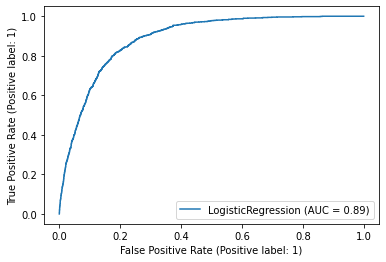

In [78]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
plot_roc_curve(lr, X_test, y_test)

## **2. DECISION TREE:**

In [79]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score

In [80]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score 
dt = DecisionTreeClassifier() 
dt.fit(X_smt,y_smt) 
print(dt.score(X_smt,y_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(X_test)[:, 1]))

1.0
AUROC on the sampled dataset :  0.798390368367889


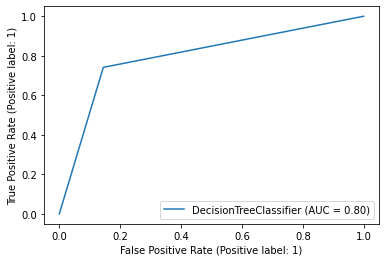

In [81]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
plot_roc_curve(dt, X_test, y_test)

In [82]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_smt, y_smt) # the model is trained
  trainAccuracy = accuracy_score(y_smt, dt.predict(X_smt)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_test, y_test, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7843494423791821  Cross val score :  0.8810972717938688
Depth  :  2  Training Accuracy :  0.8025836431226766  Cross val score :  0.888176184422823
Depth  :  3  Training Accuracy :  0.8685687732342008  Cross val score :  0.8935962939422089
Depth  :  4  Training Accuracy :  0.907007434944238  Cross val score :  0.8969145113186329
Depth  :  5  Training Accuracy :  0.9133457249070632  Cross val score :  0.8959194250232239
Depth  :  6  Training Accuracy :  0.9264684014869888  Cross val score :  0.8971368503398034
Depth  :  7  Training Accuracy :  0.9348327137546468  Cross val score :  0.8948142081846184
Depth  :  8  Training Accuracy :  0.9433271375464684  Cross val score :  0.8928233022050553
Depth  :  9  Training Accuracy :  0.9524907063197026  Cross val score :  0.8897253459150247
Depth  :  10  Training Accuracy :  0.9614498141263941  Cross val score :  0.8912740184813964
Depth  :  20  Training Accuracy :  0.9993866171003718  Cross val score :  0.86837

In [83]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score 
dt = DecisionTreeClassifier(max_depth=4) 
dt.fit(X_smt,y_smt) 
print(dt.score(X_smt,y_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(X_test)[:, 1]))

0.907007434944238
AUROC on the sampled dataset :  0.8701850305659518


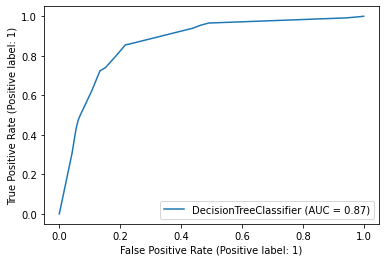

In [84]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
plot_roc_curve(dt, X_test, y_test)

## **3. K-NEAREST NEIGHBOUR:**

In [85]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]: 
  knn= KNeighborsClassifier(i)
  knn.fit(X_smt, y_smt) 
  print("K value :", i, "Cross Value Accuracy :" , np.mean(cross_val_score(knn, X_test, y_test, cv=10)))

K value : 1 Cross Value Accuracy : 0.8513450349581968
K value : 2 Cross Value Accuracy : 0.8801024299613749
K value : 3 Cross Value Accuracy : 0.8741305676428885
K value : 4 Cross Value Accuracy : 0.8810987385713588
K value : 5 Cross Value Accuracy : 0.8787762186476311
K value : 6 Cross Value Accuracy : 0.8812093580403854
K value : 7 Cross Value Accuracy : 0.8804356329144868
K value : 8 Cross Value Accuracy : 0.8818734415489171
K value : 9 Cross Value Accuracy : 0.8824267833569648
K value : 10 Cross Value Accuracy : 0.8829792695448102
K value : 20 Cross Value Accuracy : 0.8816515914535763
K value : 30 Cross Value Accuracy : 0.8812088691145552
K value : 40 Cross Value Accuracy : 0.8812094802718426
K value : 50 Cross Value Accuracy : 0.8813197330464968


In [86]:
knn= KNeighborsClassifier(i)
knn.fit(X_smt, y_smt)
print(knn.score(X_smt,y_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, knn.predict_proba(X_test)[:, 1]))

0.9108364312267658
AUROC on the sampled dataset :  0.8475721233848508


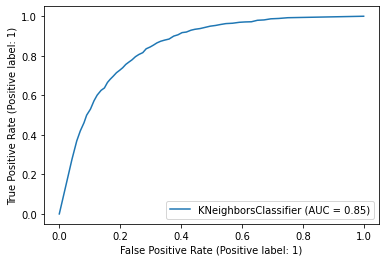

In [87]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
plot_roc_curve(knn, X_test, y_test)

## **4. XG_BOOST:**

In [88]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score 
import numpy as np 
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]: 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model model.fit(X_smt,y_smt) #train the model 
  print("Learning rate : ", lr," Cross-Val score : ", np.mean(cross_val_score(model, X_test, y_test, cv=10)))

Learning rate :  0.01  Cross-Val score :  0.8950341025766392
Learning rate :  0.02  Cross-Val score :  0.895365472057889
Learning rate :  0.03  Cross-Val score :  0.8963614139735002
Learning rate :  0.04  Cross-Val score :  0.8963616584364151
Learning rate :  0.05  Cross-Val score :  0.8985736811225736
Learning rate :  0.1  Cross-Val score :  0.8999013592138072
Learning rate :  0.11  Cross-Val score :  0.9001221092260303
Learning rate :  0.12  Cross-Val score :  0.9012283039162959
Learning rate :  0.13  Cross-Val score :  0.9003433481640835
Learning rate :  0.14  Cross-Val score :  0.9000119786828338
Learning rate :  0.15  Cross-Val score :  0.9003433481640833
Learning rate :  0.2  Cross-Val score :  0.8992375201681906
Learning rate :  0.5  Cross-Val score :  0.8985734366596587
Learning rate :  0.7  Cross-Val score :  0.8976895809905638
Learning rate :  1  Cross-Val score :  0.8924910771036034


In [89]:
X_smt

array([[54,  0,  1, ...,  0,  0,  1],
       [53,  2,  1, ...,  0,  0,  1],
       [28,  7,  1, ...,  0,  0,  0],
       ...,
       [40,  3,  1, ...,  0,  1,  0],
       [31, 10,  0, ...,  0,  0,  1],
       [30,  8,  3, ...,  0,  0,  1]])

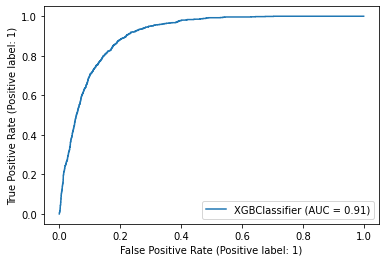

In [90]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
model = xgb.XGBClassifier(learning_rate = 0.14, n_estimators=100, verbosity = 0) # initialise the model 
model.fit(X_smt,y_smt)
plot_roc_curve(model, X_test, y_test)

## **5. Random Forest**

In [91]:
from sklearn.ensemble import RandomForestClassifier 
classifier = RandomForestClassifier(n_estimators=100,criterion="entropy") 
classifier.fit(X_smt, y_smt) 
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

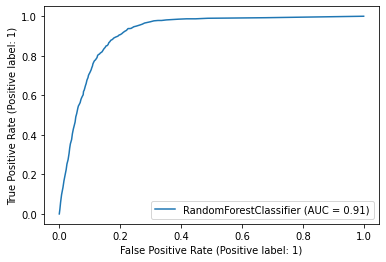

In [92]:
plot_roc_curve(classifier, X_test, y_test)

In [93]:
from sklearn.ensemble import RandomForestClassifier 
classifier = RandomForestClassifier(n_estimators=100,criterion="entropy") 
classifier.fit(X_smt, y_smt) 
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [94]:
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, classifier.predict_proba(X_test)[:, 1]))

AUROC on the sampled dataset :  0.9137841640927431




## **6. XG BOOST CLASSIFIER**

In [100]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score 
import numpy as np 
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]: 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model model.fit(X_smt,y_smt) #train the model 
  print("Learning rate : ", lr," Cross-Val score : ", np.mean(cross_val_score(model, X_test, y_test, cv=10)))
                                                                                                                                

Learning rate :  0.01  Cross-Val score :  0.8950341025766392
Learning rate :  0.02  Cross-Val score :  0.895365472057889
Learning rate :  0.03  Cross-Val score :  0.8963614139735002
Learning rate :  0.04  Cross-Val score :  0.8963616584364151
Learning rate :  0.05  Cross-Val score :  0.8985736811225736
Learning rate :  0.1  Cross-Val score :  0.8999013592138072
Learning rate :  0.11  Cross-Val score :  0.9001221092260303
Learning rate :  0.12  Cross-Val score :  0.9012283039162959
Learning rate :  0.13  Cross-Val score :  0.9003433481640835
Learning rate :  0.14  Cross-Val score :  0.9000119786828338
Learning rate :  0.15  Cross-Val score :  0.9003433481640833
Learning rate :  0.2  Cross-Val score :  0.8992375201681906
Learning rate :  0.5  Cross-Val score :  0.8985734366596587
Learning rate :  0.7  Cross-Val score :  0.8976895809905638
Learning rate :  1  Cross-Val score :  0.8924910771036034


AUROC on the sampled dataset :  0.9119486305169061


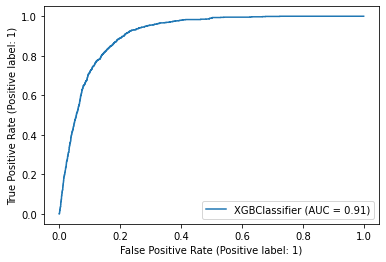

In [101]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
model = xgb.XGBClassifier(learning_rate = 0.2, n_estimators=100, verbosity = 0) # initialise the model 
model.fit(X_smt,y_smt)
plot_roc_curve(model, X_test, y_test)
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, model.predict_proba(X_test)[:, 1]))

## **FEATURE IMPORTANCE FROM ALL MODELS:**

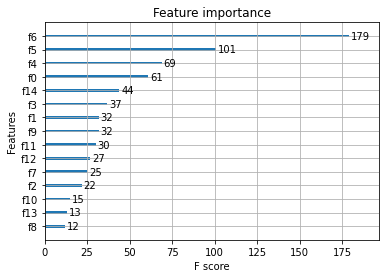

In [95]:
from xgboost import plot_importance

# plot feature importance
plot_importance(model)
plt.show()
     

In [96]:
importance = dt.feature_importances_
list(zip(importance,['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls','marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown']))

[(0.002876587250839554, 'age'),
 (0.0, 'job'),
 (0.0, 'education_qual'),
 (0.003160958269160885, 'call_type'),
 (0.0, 'day'),
 (0.07594453950426079, 'mon'),
 (0.5475119078705181, 'dur'),
 (0.0, 'num_calls'),
 (0.0, 'marital_divorced'),
 (0.0, 'marital_married'),
 (0.0, 'marital_single'),
 (0.10437155733802411, 'prev_outcome_failure'),
 (0.04407695065314459, 'prev_outcome_other'),
 (0.0, 'prev_outcome_success'),
 (0.22205749911405187, 'prev_outcome_unknown')]

In [97]:
importance = classifier.feature_importances_
list(zip(importance,['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls','marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown']))

[(0.06413584101861976, 'age'),
 (0.03993904555202449, 'job'),
 (0.017673558656448343, 'education_qual'),
 (0.04487864926597816, 'call_type'),
 (0.05840689229805952, 'day'),
 (0.08982404580459186, 'mon'),
 (0.3953882314817017, 'dur'),
 (0.03859134636907996, 'num_calls'),
 (0.022268296606756888, 'marital_divorced'),
 (0.03556616860934539, 'marital_married'),
 (0.027744661350179136, 'marital_single'),
 (0.045533203504327616, 'prev_outcome_failure'),
 (0.019504862701366785, 'prev_outcome_other'),
 (0.006869420661853281, 'prev_outcome_success'),
 (0.09367577611966717, 'prev_outcome_unknown')]

In [98]:
importance = model.feature_importances_
list(zip(importance,['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls','marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown']))

[(0.023070376, 'age'),
 (0.030615972, 'job'),
 (0.013056762, 'education_qual'),
 (0.04849278, 'call_type'),
 (0.009819997, 'day'),
 (0.05384158, 'mon'),
 (0.14208895, 'dur'),
 (0.044334132, 'num_calls'),
 (0.14502051, 'marital_divorced'),
 (0.0405605, 'marital_married'),
 (0.071743354, 'marital_single'),
 (0.1421878, 'prev_outcome_failure'),
 (0.044266112, 'prev_outcome_other'),
 (0.008235382, 'prev_outcome_success'),
 (0.18266577, 'prev_outcome_unknown')]

## **SOLUTION STATEMENT:**

## **MODELLING:** 


Models are tested to see which one can better predict consumer conversion.

1.  LOGISTIC REGRESSION, the model AUROC score is 0.9177

2.  DECISION TREE, the model AUROC score is 0.7983

3.  DECISION TREE with max depth, the model AUROC score is 0.8701

4.  KNN, the model AUROC score is 0.8475

5.  RANDOM FOREST, the model AUROC score is 0.9137

6.  XG BOOST CLASSIFIER, the model AUROC score is 0.9119

The model LOGISTIC REGRESSION has the highest AUROC score, coming in at 0.9177.